In [3]:
import pandas as pd

# Load using comma delimiter (default)
df = pd.read_csv('student-por.csv')  # no sep needed for comma-separated

# Clean column names
df.columns = df.columns.str.strip()

# Confirm column names are properly split
print(df.columns.tolist())


['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [4]:
# Encode categoricals
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Feature selection
X = df_encoded[['studytime', 'absences', 'G1', 'G2']]
y = df_encoded['G3']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.7477392675349174
MSE: 1.372077965957338
RMSE: 1.1713573177973227
R² Score: 0.859298817840107


C:\Users\91766\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


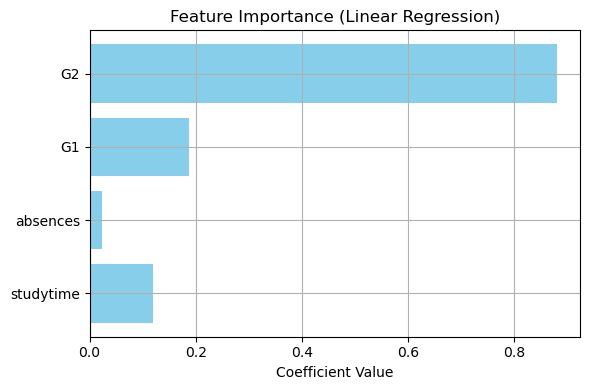

In [6]:
import matplotlib.pyplot as plt

# Coefficients from linear regression
coefficients = model.coef_
features = X.columns

# Plot
plt.figure(figsize=(6,4))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


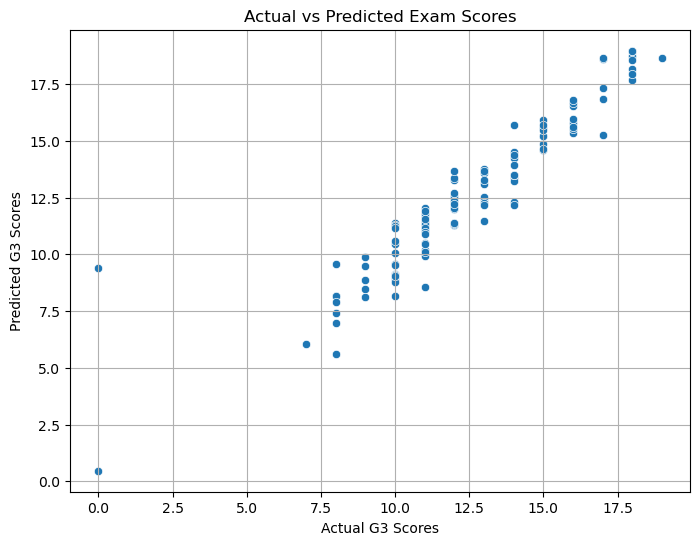

In [7]:
# Actual vs Predicted G3 Scores
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual G3 Scores")
plt.ylabel("Predicted G3 Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.show()
